1. How OS manages CPU
1. How it decides how processes and threads get to execute on those CPUs (by scheduler)

### OS Scheduler
1. Assign tasks immediately: scheduling is simple (FCFS: First come first serve)
1. Assign simple tasks first: maximize throughput (SJF: shortest job first)
1. Assign complex tasks first: maximize utilization of CPU devices, memory, etc.

### CPU Scheduling
CPU scheduler:
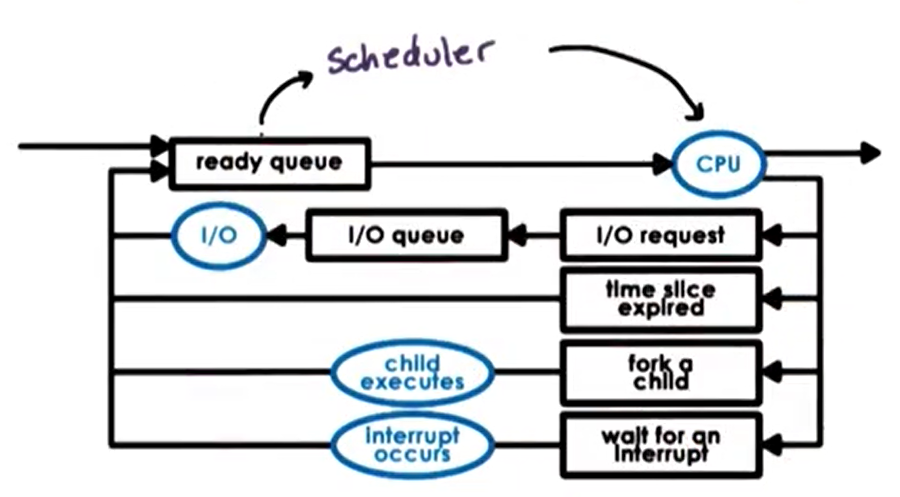
1. decides how and when processes/their threads(tasks) access shared CPUs.
1. Scheduler concerns the scheduling of both tasks running user-level processes/threadss as  well as kernel level threads
1. Chooses one of the ready tasks in the ready queue to run on CPU. The scheduler has to look at all of the tasks in the ready queue, and decide which one will be dispatched to run on the CPU.
1. Runs when
    1. CPU becomes idle: not to keep the CPU idle too long
    1. A new task becomes ready: to check whether the new task is of more important so that it should interrupt the taks currently executing on the CPU
1. How to share a CPU: give each task some amount of time on the CPU (timeslice expired timeout)
1. Once the scheduler selects a thread to be scheduled, the thread is dispatched onto the CPU:
    1. Perform a context switch to enter the context of the newly selecddted thread
    1. Enter user mode
    1. Set the program counter appropriately to point to the next instruction
    1. Ready to go
1. The objective of the OS scheduler is to choose the next taks to run form the ready queue in the system
1. Which taks should be seleted: scheduling policy/algorithm
1. How is this done: depends on runqueue data structure 
1. Runqueue and scheduling algorithm are tightly coupled.

### Run-to-completion scheduling
1. Assumes that as soon as a task is asigned to a CPU, it will run until it finishes/completes
1. Initial assumptions:
    1. group of tasks/jobs
    1. known execution times for each task
    1. no preemption
    1. a single CPU
1. Metrics:
    1. throughput (TP)
    1. average time for a job to complete (ACT)
    1. average time a job spent waiting before they are scheduled (AWT)
    1. overall CPU utilization (CU)
1. Tasks:
    1. T1: 1s
    1. T2: 10s
    1. T3: 1s
1. Algorithm:
    1. First come first server (FCFS)
        1. schedules tasks in order of arrival
        1. runqueue = queue(FIFO)
        1. Metrics:
            1. TP: 0.25 tasks/s
            1. ACT: 8s
            1. AWT: 4s
    1. Shortest job firsst (SJF)
        1. schedules tasks in order of their execution time
        1. T1->T3->T2
        1. runqueue 
            1. orderd queue
            1. treelike data structure
                1. In which the nodes in this tree are ordered based on their execution time. 
                1. When a new task is inserted the tree needs to be rebalanced. 
                1. Scheduler will always selecte the left most note in the stream if the tree is orderd.             
        1. Metrics:
            1. TP: 0.25 tasks/s
            1. ACT: 5s
            1. AWT: 1s

### Preemptive Scheduling
1. SJF + Preemptino
    1. T2 arrives first, T1 and T3 arrive at 2s
    1. T2 shoudl be preempted
    1. How to estimate the execution time: heuristics based on history
        1. job runnig time
            1. how long did a taks run last time?
            1. how long did a task run last n times? (windowed average)
1. Priority Scheduling
    1. Tasks have different priority levels
    1. Run highest priority task next (preemption: stop low priority tasks)
 
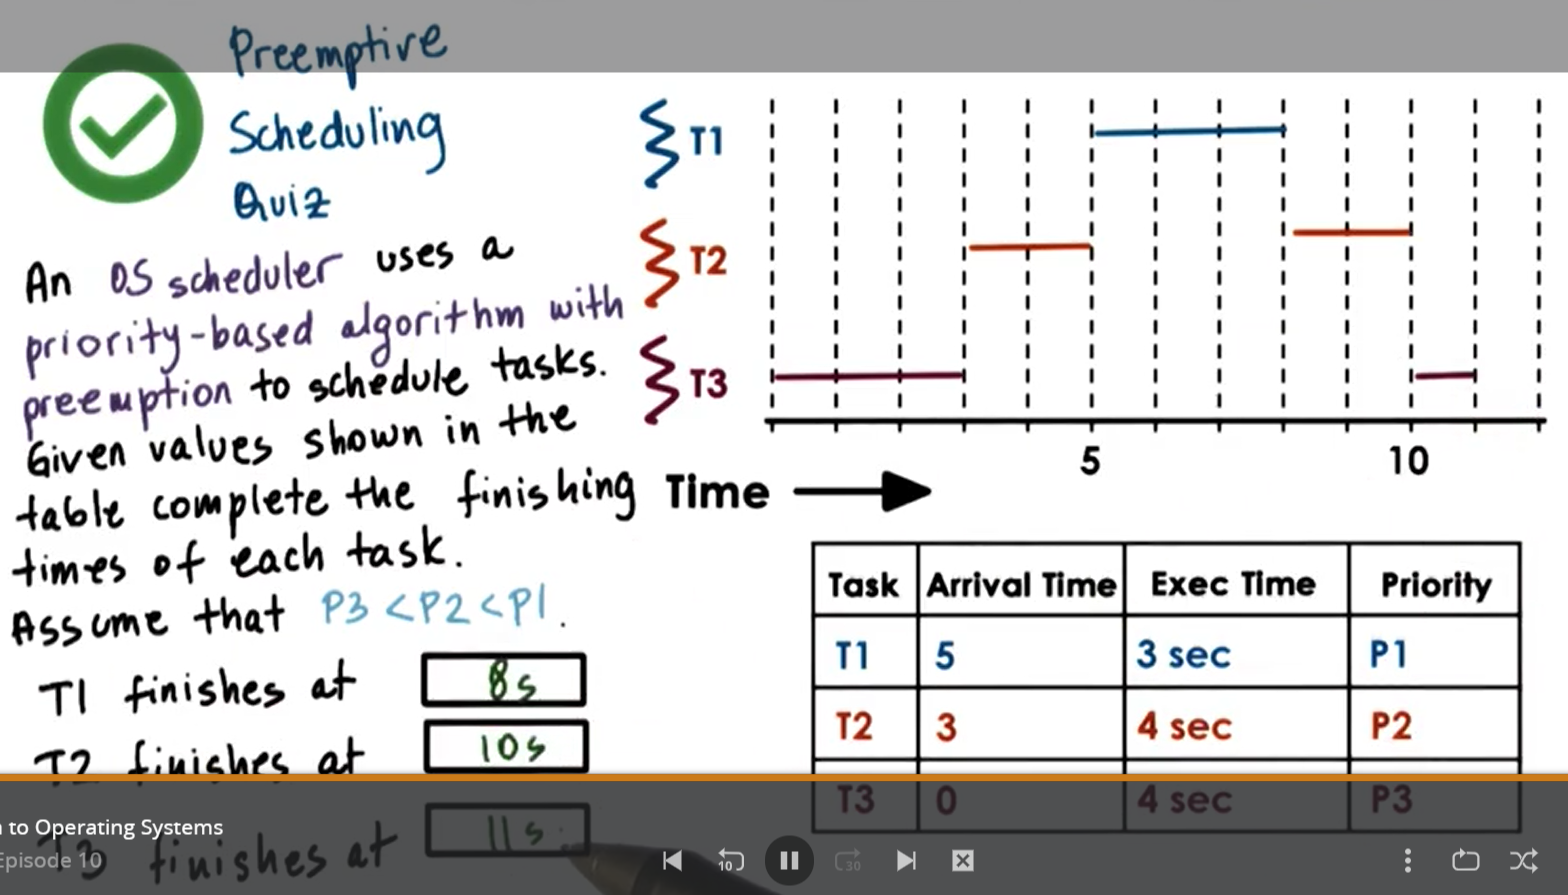

### Priority Inversion
1. Assume SJF
1. Happends when we introduce priorities into the scheduling
1. T1>T2>T3
1. T3 has a lock T1 needs
1. Order of execution: T2->T3->T1 (priorities "inverted")
1. Solution:
    1. Temporarily boost the prioirty of mutex owner (Boost the priority of T3 to the level of T1)
    1. Lower again on release (How to trigger?)
    1. T2 is executed when T1 needs lock.
    1. Not have to wait for T2 to complete for the medium prioirty thread to get in the middle
    1. It is useful to keep track of who is the current owner of the mutex
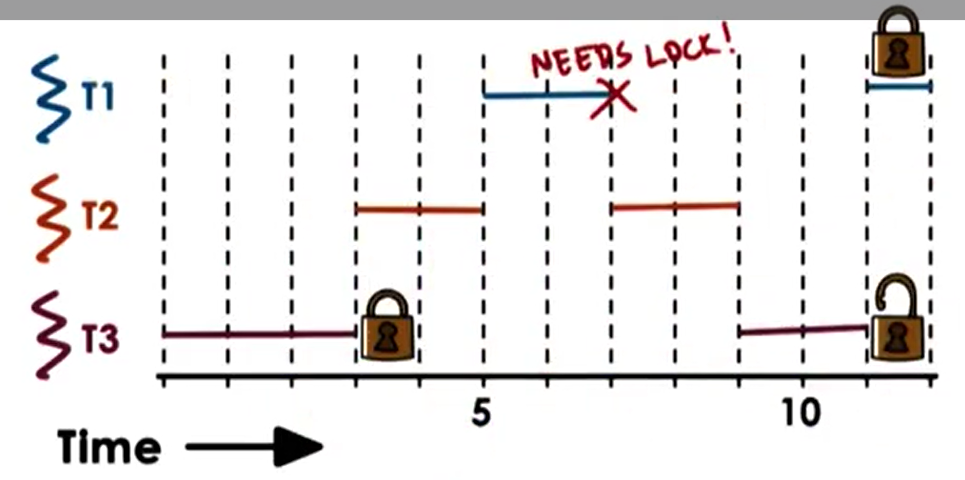


### Round Robin Scheduling (For running tasks with same priority)
1. Pick up the first task from the queue (like FCFS)  
1. The running task may yield to wait on I/O (unlike FCFS): gets preemptied, and goes to the back of runqueue when finishes
1. Schedule the next task from the runqueue
1. Can be with priorities: include preemption
1. With interleaving: timeslicing: give each task a timeslice, after the time we interupt and preempty them. and run the next task in the runqueue.  

### Timeslice
1. timeslice: maximum amount of uninterrupted time given to ta task: time quantum 
    1. Task may run less than the timeslice time 
        1. May have to wait on I/O, synchronization: will be placed on a queue and will no longer be running on the CPU
        1. Higher priority task becomes runnable 
    1. Using timeslices tasks are interleeaved
        1. timesharing the CPU
        1. CPU bound tasks: preempted after timeslice
    1. Metrics:
        1. T1: 1s, T2: 10s, T3: 1s
        1. Timeslice: 1s
        1. Without knowing the execution time
        1. TP: 0.25 tasks/s
        1. AWT: 1s
        1. ACT: 5.33s
    1. Pros:
        1. Short tasks finish sooner
        1. More responsive
        1. Lengthy I/O operation initiated sooner
        1. If the longest task initiates I/O it can wait when other tasks run. With SJF, there is no other shorter task left when the longest one is running
    1. Cons:
        1. Overhead: 
            1. Interrupt the running task
            1. Run the scheduler in order to pick the next task
            1. Perform the context switch
        1. Throughput will go down
        1. AWT goes up
        1. ACT goes up
    1. Exect impract depends on the length of the timeslice and how it relates to the actual time to perform these context swtiching and scheduling actions
    1. As long as the timeslice value significantly larger than the context switching time, we should be able to minimize these overheads 
    1. Need to consider the nature of the task and overheads in the system when determining meaningful value for the timeslice

### How long should a timeslice be

1. Balance benefits and overheads
    1. For I/O bound tasks (Timeslice value is not relavant)     
        1. 2 tasks, execution time: 10s
        1. Context switch time: 0.1s
        1. I/O operations issued every 1s
        1. I/O completes in 0.5s        
        1. RR(ts=1):
            1. TP: 0.091 tasks/s
            1. AWT: 0.55s
            1. ACT: 20.85s            
        1. RR(ts=5):
            1. TP: 0.091 tasks/s
            1. AWT: 0.55s
            1. ACT: 20.85s            
    1. For CPU bound tasks: prefers a larger timeslice
        1. 2 tasks, execution time: 10s
        1. Context switch time: 0.1s
        1. Don't care about responsiveness: 
            1. The user is not necessarily going to perceive when they started
            1. They cares about when they complete and overall when all of the tasks submitted to the system complete
        1. RR(ts=1):
            1. TP: 0.091 tasks/s
            1. AWT: 0.55s
            1. ACT: 20.85s
        1. RR(ts=5): (Better)
            1. TP:0.098 tasks/s
            1. AWT: 3.05s
            1. ACT: 17.75
        1. RR(ts=infinite):
            1. TP: 0.1 tasks/s
            1. AWT: 5s
            1. ACT: 15s 
    2. For mixed CPU-bound and I/O bound tasks: smaller timeclice task is better   
        1. 2 tasks, execution time: 10s
        1. Context switch time: 0.1s
        1. I/O operations issued every 1s
        1. I/O completes in 0.5s    
        1. T1: CPU bound
        1. T2: I/O bound     
        1. RR(ts=1):
            1. TP: 0.091 tasks/s
            1. AWT: 0.55s
            1. ACT: 20.85s            
        1. RR(ts=5):
            1. TP: 0.082 tasks/s
            1. AWT: 2.55s
            1. ACT: 17.75s        
        1. Pros of smaller timeclice:
            1. To run more quickly to issue an I/O request or to respond to a user 
            1. Keep both the CPU and the I/O devices busy
     
1. Conclusion:
    1. CPU bound tasks prefer longer timeslices
        1. Limits ocntext switching overhead
        1. keeps CPU utilization and throughput high
    1. I/O bound tasks prefer shorter timeslices
        1. I/O bound tasks can issue I/O operations earlier
        1. Keep CPU and device utilization high
        1. better user-perceived performance 
        
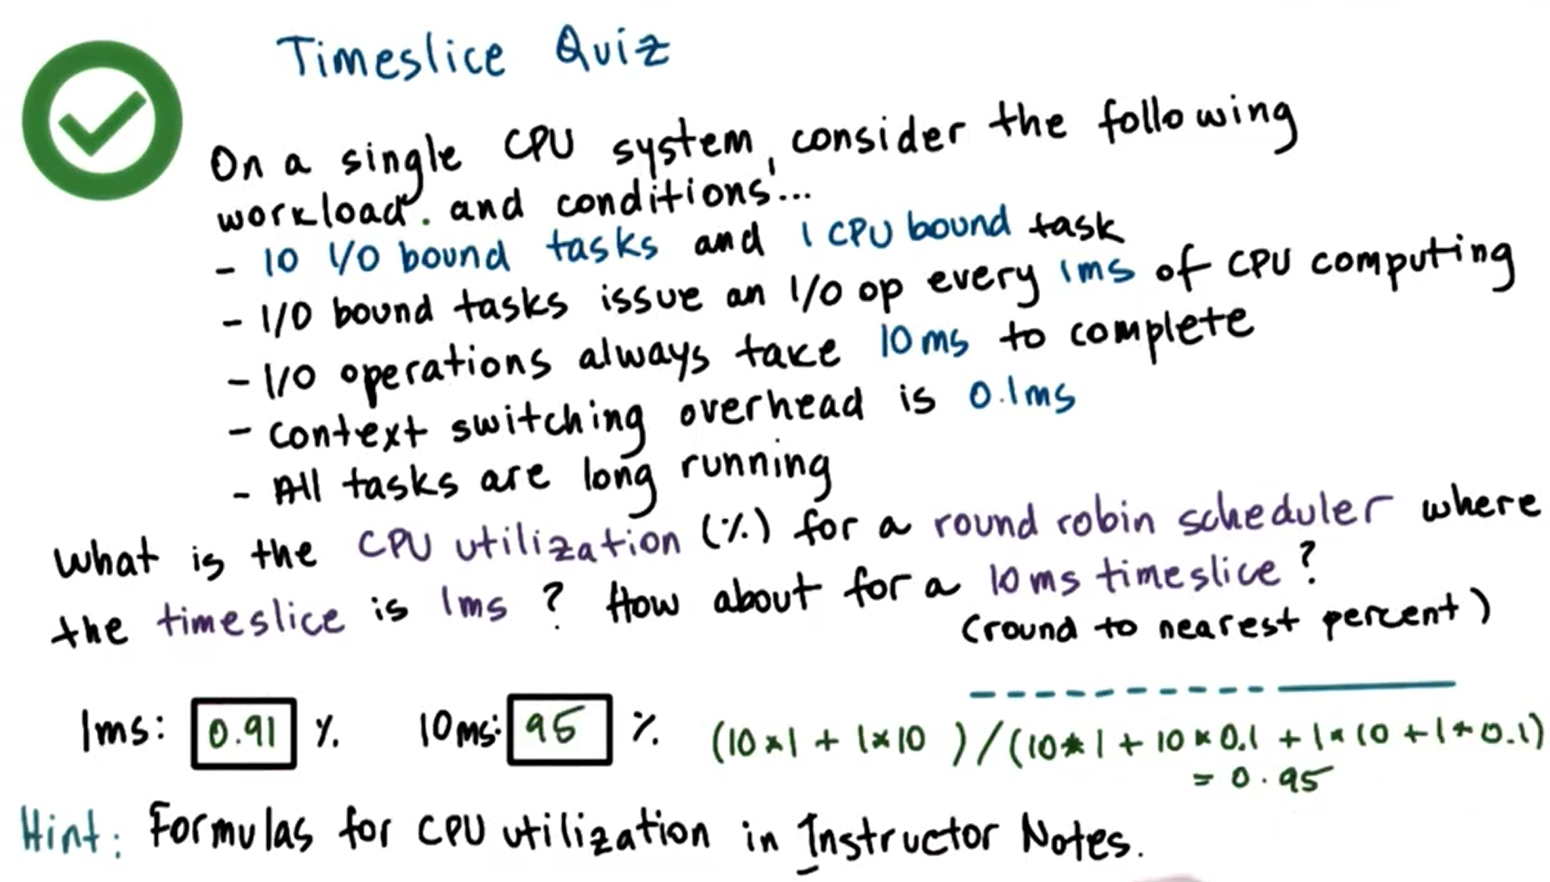
For I/O devices smaller timeslices result in higher utilitzation

### Runqueue Data Structure
1. Make it easy for the scheduler to find the next thread to run, given the scheduling criteria
1. If we want I/O and CPU bound tasks to have different timeslice values, we have two options 
    1. same runqueue, and check type
    2. two different structures

### Dealing with different timeslice values
1. Internally it has multiple separate queues
1. Ordered by I/O intensity
1. Most I/O intensive queue has the shortest timeslice and the highest priority 
1. CPU intensive queue has a timeslice of infinity (FCFS) with lowest priority
1. Pros:
    1. timeslicing benefits provided for I/O bound tasks
    1. timeslicing overheads avoided for CPU bound tasks
1. How do we know if a task is CPU or I/O intensive/How do we know how I/O intensive a task is?  
    1. History based heuristics 
        1. What about new tasks?
        1. What about tasks that dynamically change phases in their behavior
1. Multi-level Feedback Queue (MLFQ) by Fernando Corbato, Turing Award Winner
    1. Task enter topmost queue: assume it the most demanding task when it comes to these scheduling operations that it will need to be contex tswtich most often
    1. If it yeilds voluntarily: 
        1. good choice
        1. keep the task at this level 
    1. If task uses up entire timeslice: 
        1. More CPU-intensive
        1. push down to lower level
    1. Task in lower queue gets priority boost when releasing CPU due to I/O waits
    1. Not same as Prioirty Queues
        1. Different scheduling policies that are associated with each of the different elvels part of this data structure
        1. The data structure incorporates the feedback mechanism that allows us over time to adjust which one of these levels will be place a task and when we/are trying to figure out what is the best time sharing schedule for the subtask in the system.
    1. Examples:
        1. Linux O(1) O of one scheduler
        1. Solari scheduling mechanism 
            1. 60 levels
            1. Fancy feedback rules that determine how and when a thread gets pushed up and down theses different levels

## O(1)
1. O(1) == constant time to select/add task regardless of task count
1. preemptive and priority-based scheduler 
1. 140 priority levels: 
    1. 0 the highest (200ms time quantum).
    1. 139 the lowest (10ms time quantum)
    1. two classes:
        1. realtime tasks (0-99)
        1. timesharing (100-139)
            1. All user process
                1. default value: 120
                1. Nice value (adjustment via system calls): -20 to 19
    1. Timeslice value: different timeslice value with different priority level XXXXX
        1. depends on priority
        1. smallest for low priority
        1. highest for high priority
    1. Feedback: how the task behaved in the past to determine how to adjust their priority levels in the futrue
        1. Depends on sleep time: waiting/idling
        1. Longer sleep;
            1. interactive
            1. prioirty: -5 (boost)
        1. smaller sleep:
            1. compute-intensive
            1. priority: +5 (lowered)
    1. It differs in how it assigns the timeslice values to priory and how it uses the feedback.
1. Runqueue== two arrays of tasks 
    1. each array element points to the frist runnable task at the correspoinding priority level 
    1. Active array:
        1. The primary one that the scheduler uses to pick next task to run
        1. Constant time to add/select: need to index into this array based on the priority level of the task and then follow the pointer to theend of the task lsit to enqueue the task
        1. Constant time to select a task: 
            1. the scheduler relies on certain instructions that return the position of the first set bit in a sequence of bits. 
            1. The sequence of bits corresponds to the priority levels 
            1. A bit value of one indicates that there are tasks at that priority level 
            1. It takes a constant amount of tim to run those instructions to detect what is the first prioirty level taht has certain tasks on it 
            1. Once the position is known, it takes a constant time to index in to this array and select the first task fron the runqueue that's associated with that level
        1. Tasks remain in queue in active array until timeslice expires
            1. If tasks yield the CPU to wait on an event or are preempted due to higher priority task becoming runnable, the time they spent on the CPU is subtracted from the total amount of time from the time0slice
            1. If it is less than the time slice, they are still placed on the corresponding queue in the active list
        1. Only after a task consumes its entire timeslice, it will be removed from the active list and placed on the appropricate queue in teh expired array
    1. Expired list:
        1. Inactive list
        1. The scheduler will not select tasks from the expired array as long as there are still tasks on any of the queues in the active array.
        1. When there are no more tasks left in the active array, the pointers of these two list will be swapped
        1. The expired array will become the new active one and vice versa
    1. Why in the O(1) scheduler the low priority tasks are given low timeslices and high prioirty tasks are given high timeslices: 
        1. As long as on active array tasks will be scheduled
        1. Once on expired array tasks will not be scheduled
        1. low priority tasks have low timeslice
        1. high priority tasks have more time amount to run
        1. the two arrays serve as aging mechanism so these high priority tasks will ultimately consume their time slice and be placed on the expired array, and the low priority tasks will get a chance to run for their small time amount 
1. Introduced in 2.5 by Ingo Molnar

1. Replaced by Completely Fair Scheduler (CFS)
    1. O(1) scheduler affected the prformance of interactive tasks significantly. 
        1. A lot of jitter: Once placed on the expired list, they won't be scheduled unless all remaining tasks from the active list have a chance to execute for their timeslice.
        1. It doesn't make any fairness guarantees: In a given time interval, all of the tasks should be able to run for an amount of time that is proportional to their priority 
    1. The workload changed as typical applciations in the Linux environment became more time senstive, like stream. 
    1. The jitter introduced by O(1) scheduler becomes unacceptable 
    1. CFS became the default scheduler starting in the Linus 2.6.23 kernel (also by Ingo Molnar) 
    1. O(1) scheduler is still in the distribution and change be chosen to run the task.
    1. For non-real time tasks
    1. Real time tasks are scheduled by a real time scheduler
    1. Runqueue == Red-Black Tree
        1. Belong to dynamic tree structure family 
            1. a property that as nodes are added or removed from the tree
            1. The tree will self balance itself so that all the paths from the root to the leaves of the tree are approximately of the same size 
            1. ordered by virtual runtime "vruntime": tasks are ordered in the tree based on the amount of time that they spend on CPU
            1. CFS tracks this vruntime in a nanosecond granularity
            1. each of the internal nodes in the tree corresponds to a task
            1. the nodes to the left of the task correspond to those task which had less time on the CPU, so they need to be scheduled sooner
            1. the nodes to the right are tasks have consumed more CPU time, so they don't have to be scheduled as quickly as the other ones. 
            1. the leaves in the  tree don't play any role in the scheduler
            1. CFS scheduling algorithm:
                1. always pick leftmost node, or the task spent the least time on the CPU
                1. periodically CFS incrase the vruntime of the task currently executing on the CPU
                1. at that point it will compare the vruntime of the current running task to the vruntime of the leftmost task int the tree
                    1. if is current vruntime is smaller than the leftmost vruntime, then continue executing
                    1. if larger, preempt and place appropriately in the tree, then the leftmost task will be selected to run next
                    1. vruntime progress rate depends on priority and niceness: to account for the differences in the task priorities or in their niceness value, CFS changes the effective rate at which the task's virtual time progresses
                        1. rate faster  for low priority: for lower priority tasks time passes more quickly, their virtual run time value progresses faster 
                        1. rate slower for high priority
                        1. same tree for all priorities
                    1. performance:
                        1. select task: O(1) (select the leftmost node)
                        1. add task: O(logN)
                    1. At some point the CFS will be replaced by something else that will be able to perform better for adding tasks
                        

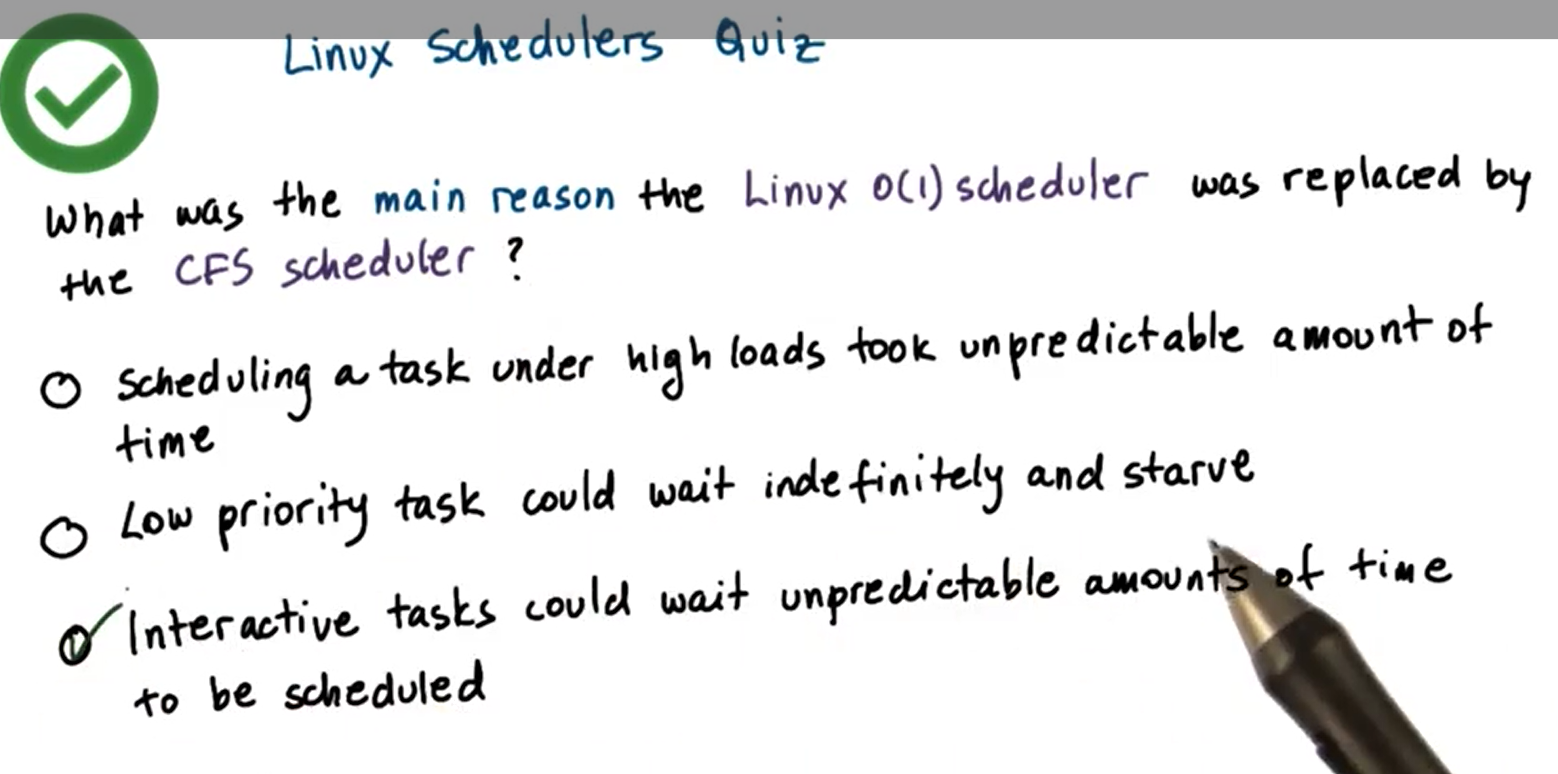
1. It takes a constant amount of time to select and schedule a task regardless of the load
1. If we keep having tasks with high priority, it may be true

### Scheduling on Multi-CPU Systems
1. Shared memory Multiprocessors (SMP)
    1. Multiple CPUs
    1. Each CPU have their maybe own private caches like L1 and L2
    1. last level caches that may or may not be shared among the CPUs (LLC)
    1. DRAM, a system memory that is shared across all of the CPUs
1. Multicore architectures
    1. Each cpu can have multi internal cores
    1. Each core has private caches
    1. Overall the entire multicore CPU will ahve some shared last level cache(LLC)
    1. Some shared system memory
    
1. OS sees all of the CPUs as well as the cores in the CPU as entitites onto which it can schedule all execution context so thread (the cores as CPU)

1. the performance of threads and processes is highly dependent on whether the state that the thread needs is in the cache or in memory
1. If thread is executing on CPU 1 first, overtime this thread was slightly able to bring a lot of the state that it needs both into the last level of cache that's ascoiated with this CPU and in the private caches that are available on the CPU (hot cache, helps the performance)
1. Next time if the thread is schedule on another CPU, none of its states will be there (cold cache)
1. cache-affinity: try to schedule the thread back on the same CPU where it was executed befroe for likely hot cache
    1. keep the tasks on the same CPU as much as possible
    1. can be achieved with a hiearchical scheduler architecture
        1. at the top level a load balancing component divides the tasks among CPUs
        1. a per CPU runqueue repeatedly schedules those tasks on a given CPU as much as possible
        1. to balance the load across the different CPUs and their per-CPU runqueue, the top level entity in the scheduler 
            1. can look at information such as the lenght of each of these queues to decide how to balance tasks across the CPUs: 
            1. when CPU is idle, it can at that point start looking at the other CPUs and try to get some more work from them. 
1. Multiple memory nodes. 
    1. the CPU and the memory nodes will be interconnected via some type of interconnect (QuickPath Interconnect or QPI)
    1. a memroy node can be technically connected to some subste of the CPU such as 
        1. a socket of multiple processors: the access from that set of CPUs to the memory node will be faster versus from that particular processor to a memory node that's associated with another set of CPUs
        1. access to both local memroy and remote memroy is possible but takes different amount of time
    1. platform non-uniform memory access platforms (NUMA)
        1. multiple memory nodes
        1. memory node closer to a socket of multi processors. 
        1. from scheduling prospective, it would make sense that for thescheduler to divide tasks in such a way that tasks are bound to those CPUs that are coloser to the memory node where the state of htose tasks is (NUMA-aware scheduling)
        

1. why context switch
    1. CPU has one set of registers to describe the active execution context (the thread currently running on the CPU)
    1. include the stack pointer and program counter
    1. overtime, hardware architects have recognized that they can do certain things to help hide some of the overheads associated with cnotext swtiching: to have CPUs that have multi set of registers that each set of register can describe the context of a separate thread, of a sepearte execution entity (hyper threading)
    
### Hyperthreading
    1. multiple hardare-supported execution contexts
    1. still one CPU: only one thread can execute at a particular moment of time
    1. with very fast context switch
    1. also referred as 
        1. hardeware multithreading
        1. hyperthreading
        1. chip multithreading (CMT)
        1. simultaneous multithreading (SMT)
    1. some server design supports to upto eight hardware threads
    1. hardware multithreading can be enable and disable at boot time
        1. if enabled, each of these harware contexts appears to the operating system scheduler as separate context, a spearate virtual CPU onto which it can scheudule threads 
    1. scheduler need to deciede which two threads to schedule at the same time to run on these hardware contexts
    1. when to context switch: if t_idle> 2*t_ctx_switch
        1. SMT ctx_switch - O(cycles)
        1. memory load - O(100 cycles)
        1. it doesn't make sense to contex switch to the other hardware thread 
        1. hyperthreading will help us even hide the memroy access latency that thredas are expereiencing
    
    1. HT has implication on scheduling taht it raises some other requriements when we're trying to decide what kinds of threads should we co schedule on the hardware threads in the CPU
        1. Chip multithreaded Processors Need a new OS Scheduler by Fedorova et al

### Threads and SMT
1. Assumptions
    1. thread issues instruction on each cycle: CPU bound thread that issues instructions that need to run on the CPU will be able to achieve a max metric in therms of instructions per cycle (IPC), which is IPC = 1, so if we have only one CPU IPC can't be greater than 1
    1. memeory access = 4 cycles: memory bound thread will expereience some idle cycles when it's waiting for the memory access to return
    1. Hardware switching instaneous 
    1. SMT wit h2 hardware threads
1. coschedule compute-bound thread on the two hardware contacts
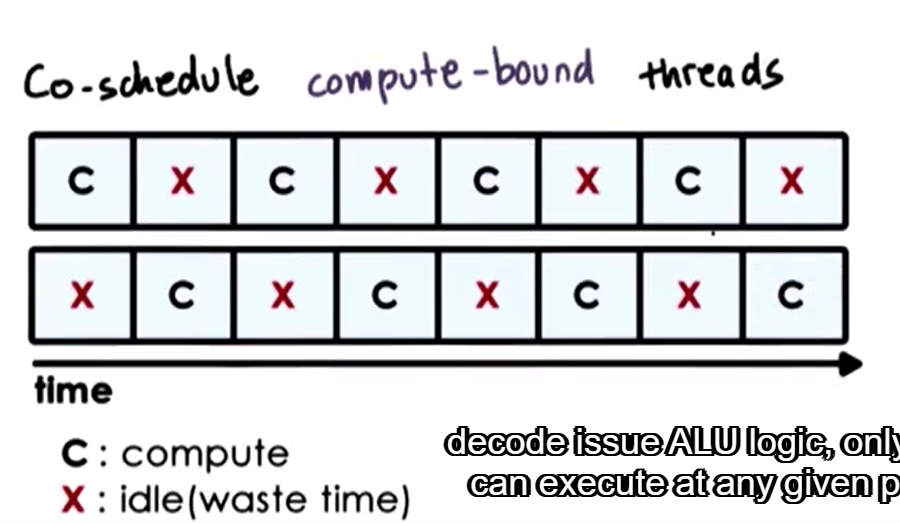
    1. only one cpu pipeline: one cpu fetch decode issue ALU logic, only one of t hem can execute at any given point of time
    1. the two threads interfere with each other, they will contend for the CPU pipeline resources
    1. performance degrades by a factor of 2: in the best case, every one of them will basically spend one cycle idling while the other thread issues its instruction
    1. memory idle
1. coschedule memory-bound thread on the two hardware contacts
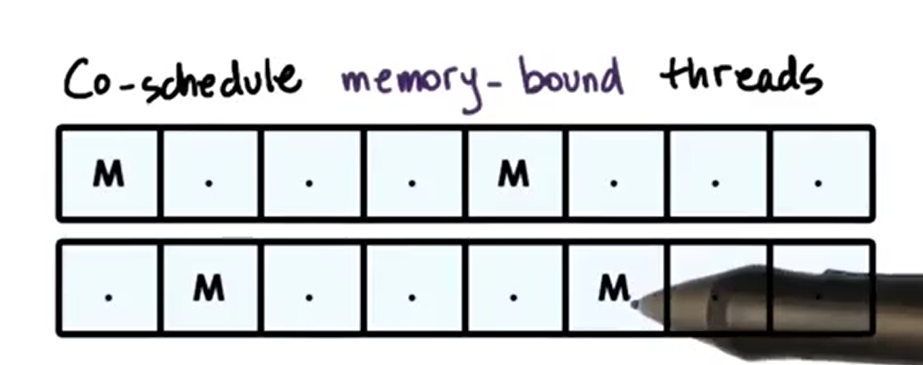
    1. CPU idle: waste of CPU cycles
1. Co-schedule compute-and memory- bound threads:
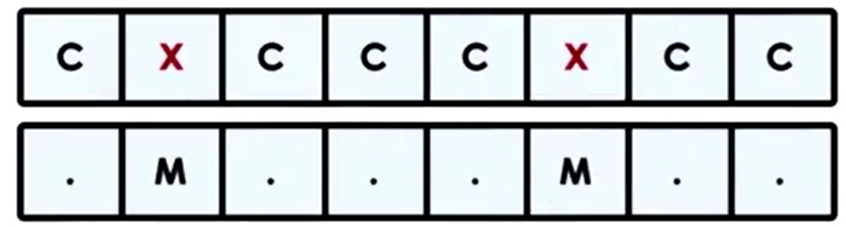
    1. mix of CPU and memroy intensive threads
    1. avoid/limit contension on processor pipeline
    1. all components (CPU and memory) will utilized
    1. still leads to interferernce and degradation but minimal 

### How do we decide if a thread is CPU-Bound or Memory-Bound
1. Use historic Information
1. "sleep time" won't work:
    1. the thread is not sleeping when waiting on memory, in CPU pipeline not in a software queue
    1. software to track sleep time takes too much time to compute, the decision what to execute should be very very fast
1. need hardware-level information: hardware counters
    1. get updated as the processor is executing 
    1. keep information about various aspectsw of the execution 
        1. cache usage, L1, L2, ... LLC misses 
        1. IPC: number of instructions that were retired
        1. power and energy data usage of the CPU or particualr components of the system
    1. software interface and tools to access the hardware information
        1. e.g. oprofile, Linux perf tool
        1. oprofile website lists avaiable hardware counters on different architectures (hardware counters are not uniform on all platforms)
    1. from hardware counters practical and research techniques can (g)estimate what kind of resources a thread need (CPU or memory), then sheculer can use that information to pick a good mix of threads in the runqueue
        1 from the llc misses, the scheduler can decide that a thread is memroy bound so its footprint doesn't fit in the cache
        1. LLC misses can tell if somthing changed the execution of the thread so that now it's executing with some different data in a different phase of its execution and it's running with the cold cache.
        1. one counter can tell different things about a thread
        1. scheuler can make informed decisions regarding the workload mix taht they need to select
            1. typically with the combination of multiple counters
            1. rely on some models with per architecture threshholds
            1. have been trained based on some well-understood workloads (memroy/CPU instensive) then made some observations regarding the values of those counters 
            1. we know how to interpret them for other types of workloads (out of the scope of this class)

### Is Cycles-per-Instruction (CPI) Useful? 
1. to decide thread CPUness vs Memoryness is cycles for instruction
    1. memory bound: high CPI
    1. CPU bound: 1 (or low) CPI
    1. given that there isn't exactly c CPI counter on the processors that Fedorapa uses in her work 
    1. computing something like one over IPC would require software computations so it's not acceptable
    1. the paper uses a simulator or simulation based evaluation that supposedly the CPU does have a CPI counter and then looks at a better scheduler can take that information and make good decisions 
    1. if she can demostrate that CPI is a good metrics then hardware engineers will add this particular type of counter in future architectures
    1. the paper simulates a system that has 
        1. four cores where every one of the cores is four way multi threaded
        1. total of 16 hardware context
    1. Synthetic Workload where her threds have a CPI of:
        1. 1 (most CPU intensive), 6, 11, and 16 (most memory intensive)
        1. the overall workload  mix has four threads of each kind        
        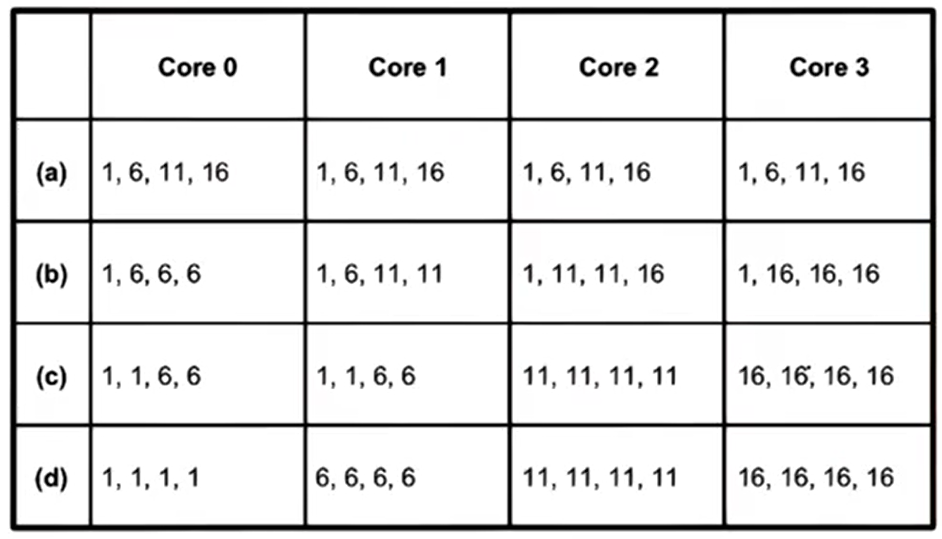 
        1. evaluation: what is the overall perfromance when a specific mix of threads gets assigned to each of theses 16 hardware contexts.
        1. metrix: IPC
            1. max IPC = 4
        1. trying to make static decisions that a scheduler would have made to understand whether it makes sense to build a scheduler that will use CPU as a metric
        

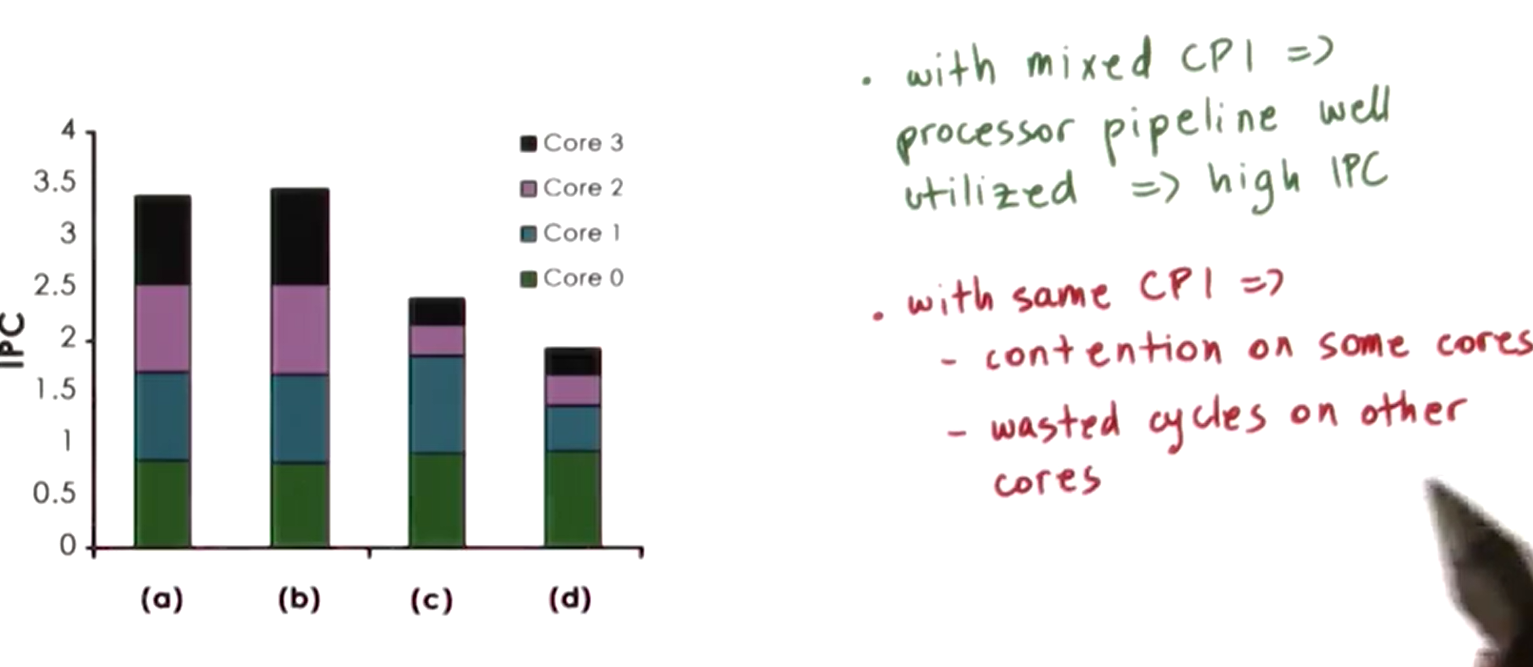
Conclusions:
1. CPI is a great metric
1. let's build a scheduler that uses it 
1. let's bulid hardware that tracks it

### Realistic Workloads
1. Do real workloads have CPI = 1. 6, 11, 16?
1. profile a number of applications from several benchmark suits, which are widely recognized in industry and in academia as well that they include workloads that are representative of real world relevant applications
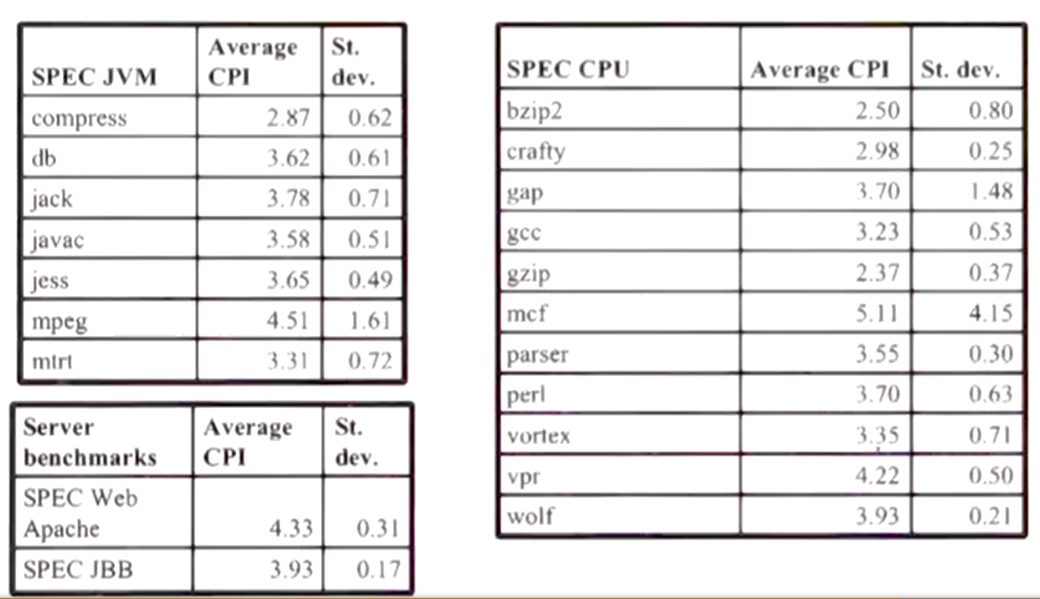
1. real world workload don't exhibit significant differentces in their CPI value, so CPI really won't be a useful metric 
1. takeaways
    1. resouce contenion in SMTs for processor pipeline
    1. hardware counter can be used to characterize workload, to understand better so you can better inform the OS level resource management
    1. schedulers should be  aware of resource contention not just load balancing
        1. scheduler should think about choosing a set of tasks taht are not going to cause a resource contention with respect to the processor pipeline or the memory controller or some thype of I/O devices
    1. LLC usage would have been a better choice
        1. important contributor to performance degradation when you are running multi tasks on a single hardware of multithread/multicore platform is the use of the cache resource, in particualr the last level cache
            1. keep track of how a set of threads is using the cache as a resource 
            1. pick a mix that doesn't cause contention on the LLC usage 